In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv("BlackFriday.csv")
data=data.drop(["User_ID","Product_ID"],axis=1)

In [8]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [52]:
data.shape

(537577, 12)

#### Here we are predict purchase amount based on all this remaning variables Here Purchase is Dependent Variable remaning all variables are Independent variables machinr learning in features 

## Exploratory data analysis

### univariate analysis

## Gender

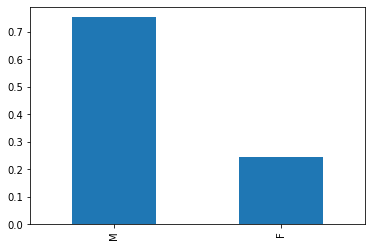

In [9]:
data["Gender"].value_counts(normalize=True).plot.bar()
plt.show()

#### Inference: About 25% Male and 75% are Females

## AGE

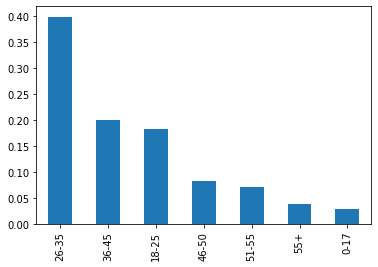

In [10]:
data["Age"].value_counts(normalize=True).plot.bar()
plt.show()

###### Inference: 26-35 ARE GROUP ARE MORE IN OUR DATA SET

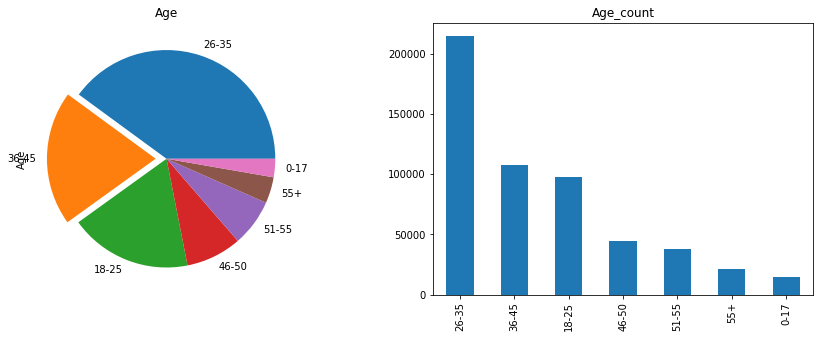

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
data["Age"].value_counts().plot.pie(explode=[0,0.1,0,0,0,0,0],ax=ax[0])
ax[0].set_title("Age")
data["Age"].value_counts().plot.bar(ax=ax[1])
ax[1].set_title("Age_count")
plt.show()

### Occupation

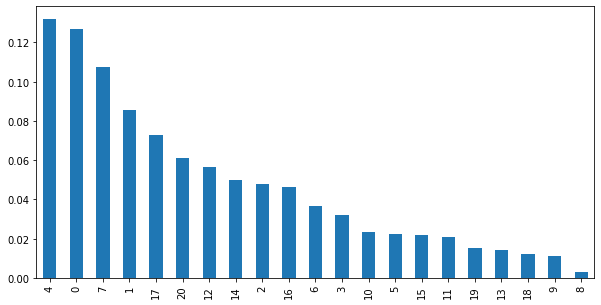

In [12]:
plt.figure(figsize=(10,5))
data["Occupation"].value_counts(normalize='True').plot.bar()
plt.show()

###### Inference: *occupation 4 and 0 accounted for 25% for buyers*

###### DONT APPLY PIE CHAT IF THE SEGMENTS ARE MORE THAN 6 OR 7 BEST WILL BE 3 OR 4

## CITY

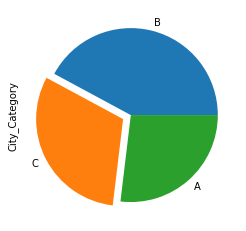

In [13]:
data["City_Category"].value_counts().plot.pie(explode=[0,0.1,0])
plt.show()

## Stay_In_Current_City_Years

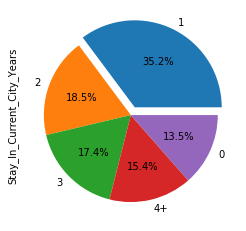

In [14]:
data["Stay_In_Current_City_Years"].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0,0,0,0])
plt.show()

## Marital_Status

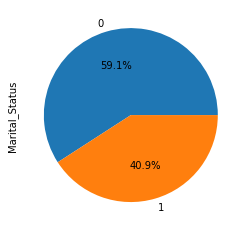

In [15]:
data["Marital_Status"].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Dependent Variable Purchase

C:\Users\vikhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


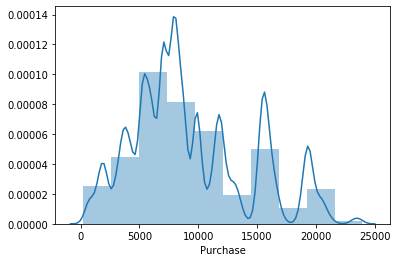

In [16]:
sns.distplot(data["Purchase"],kde='True',bins=10)
plt.show()

##### Inference:Many customers are buying the same amount

## BIVARIATE ANALYSIS

#### we are going with dependent variable only

##### purchase and gender

<Figure size 720x360 with 0 Axes>

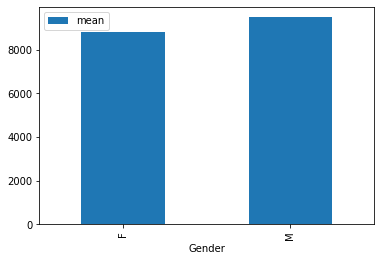

In [25]:
plt.figure(figsize=(10,5))
data['Purchase'].groupby(data["Gender"]).agg(["mean"]).plot.bar()
plt.show()

In [26]:
data["Purchase"].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

#### Here are making purchase in to category

In [27]:
def purchase_cat(purchase):
    if purchase< 5900:
        return 1
    elif 5900 <= purchase < 8000:
        return 2
    elif 8000 <= purchase < 12000:
        return 3
    else:
        return 4

In [29]:
data["purchase_catagory"]=data["Purchase"].apply(purchase_cat)

In [32]:
data.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,purchase_catagory
0,F,0-17,10,A,2,0,3,NaN,NaN,8370,3
1,F,0-17,10,A,2,0,1,6.0,14.0,15200,4


# Groupby is connect to one continuous and one category variable

In [30]:
data["Purchase"].groupby(data["purchase_catagory"]).agg(['min','max'])

,min,max
purchase_catagory,,
1,185,5899
2,5900,7999
3,8000,11999
4,12000,23961


In [31]:
data["purchase_catagory"].value_counts()

3    139102
4    138518
1    136999
2    122958
Name: purchase_catagory, dtype: int64

#### stacked bar graph

# connect two catogery variable we gonna use crosstab

In [40]:
pg=pd.crosstab(data["purchase_catagory"],data["Gender"],normalize=0)

In [41]:
pg

Gender,F,M
purchase_catagory,,
1,0.261046,0.738954
2,0.269149,0.730851
3,0.254195,0.745805
4,0.202003,0.797997


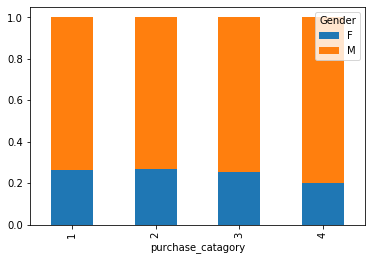

In [42]:
pg.plot.bar(stacked="True")

Inference: As we see in the chat that there is no difference between the male and female buyers in the case of first 3 classes of purchase category 
    how ever, in case of highest purchase category,male buyers are more than female category

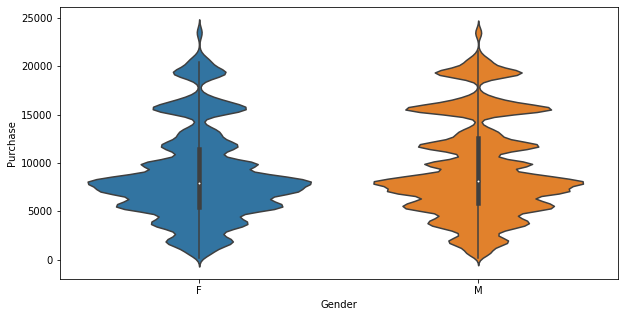

In [21]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Gender',y='Purchase',data=data,)

## who are big buyers

#### lambda function

In [43]:
data["bigbuyer"]=data["Purchase"].apply(lambda x: 1 if x>12000 else 0)

In [45]:
data.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,purchase_catagory,bigbuyer
0,F,0-17,10,A,2,0,3,NaN,NaN,8370,3,0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200,4,1
2,F,0-17,10,A,2,0,12,NaN,NaN,1422,1,0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057,1,0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969,2,0


#### No of big buyers

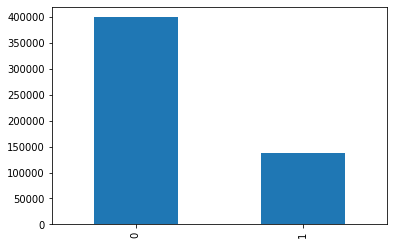

In [54]:
data["bigbuyer"].value_counts().plot.bar()

***Inference: Here 138474 numbers are bigbuyers out of 537577***

##### You have purchase category who is buying more by age group

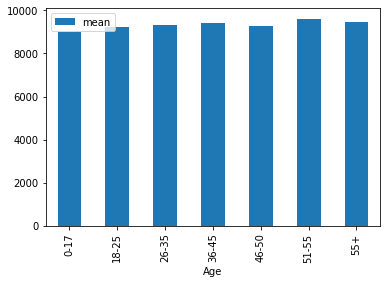

In [57]:
data["Purchase"].groupby(data["Age"]).agg(['mean']).plot.bar()

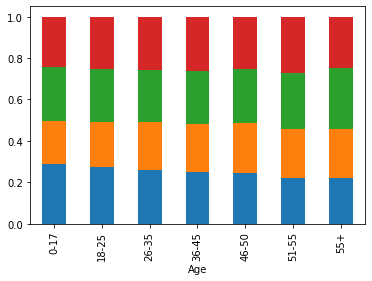

In [60]:
pd.crosstab(data["Age"],data["purchase_catagory"],normalize=0).plot.bar(stacked=True,legend=False)

## big buyer age group

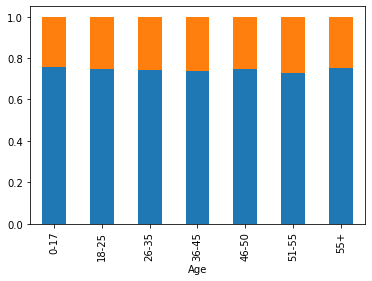

In [61]:
pd.crosstab(data["Age"],data["bigbuyer"],normalize=0).plot.bar(stacked=True,legend=False)

#### who is giving maximum bussiness

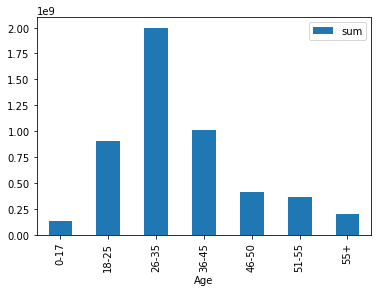

In [63]:
data["Purchase"].groupby(data["Age"]).agg(['sum']).plot.bar()

<Figure size 1440x576 with 0 Axes>

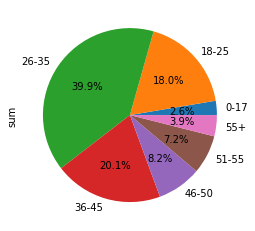

In [69]:
plt.figure(figsize=(20,8))
data["Purchase"].groupby(data["Age"]).agg(['sum']).plot.pie(autopct="%1.1f%%",subplots=True,legend=False)
plt.show()

**Inference: From the AGE grop of 26-35 they are giving the 40% profit**

### purchase and occupation 

In [62]:
data["Occupation"].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

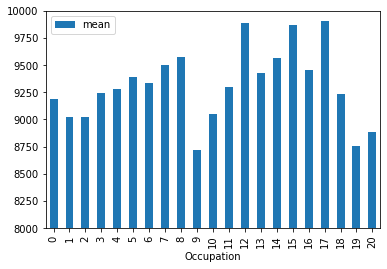

In [83]:
data["Purchase"].groupby(data["Occupation"]).agg(['mean']).plot.bar()
plt.ylim(8000,10000)
plt.show()

<Figure size 1440x1080 with 0 Axes>

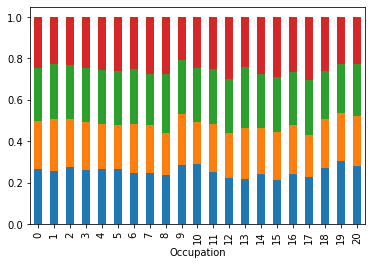

In [81]:
plt.figure(figsize=(20,15))
pd.crosstab(data["Occupation"],data["purchase_catagory"],normalize=0).plot.bar(stacked=True,legend=False)

#### Inference:occupation  12 and 7 are highest 

### occupation and bigbuyer

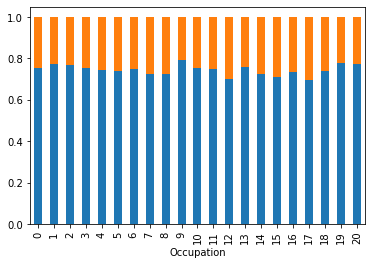

In [84]:
pd.crosstab(data["Occupation"],data["bigbuyer"],normalize=0).plot.bar(stacked=True,legend=False)

**Inference: From the above stacked bar occupation 12 is buying more**

## City_Category and purchase

In [85]:
data["City_Category"].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

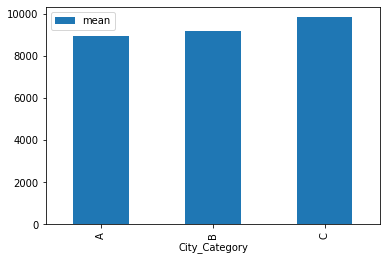

In [87]:
data["Purchase"].groupby(data["City_Category"]).agg(["mean"]).plot.bar()

In [88]:
data["City_Category_age"]=data["City_Category"]+data["Age"]

In [89]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,purchase_catagory,bigbuyer,City_Category_age
0,F,0-17,10,A,2,0,3,NaN,NaN,8370,3,0,A0-17
1,F,0-17,10,A,2,0,1,6.0,14.0,15200,4,1,A0-17
2,F,0-17,10,A,2,0,12,NaN,NaN,1422,1,0,A0-17
3,F,0-17,10,A,2,0,12,14.0,NaN,1057,1,0,A0-17
4,M,55+,16,C,4+,0,8,NaN,NaN,7969,2,0,C55+


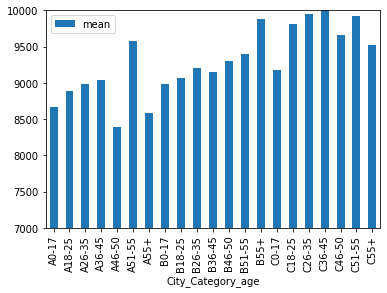

In [93]:
data["Purchase"].groupby(data["City_Category_age"]).agg(['mean']).plot.bar()
plt.ylim(7000,10000)
plt.show()

## Marital_Status and purcahse

In [95]:
data["Purchase"].groupby(data["Marital_Status"]).agg(['mean'])

,mean
Marital_Status,
0,9333.325467
1,9334.632681


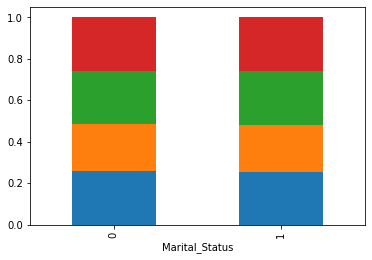

In [100]:
pd.crosstab(data["Marital_Status"],data["purchase_catagory"],normalize=0).plot.bar(stacked=True,legend=False)

In [101]:
data["Marital_Status"].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

## GET DUMMIES AND LABEL ENCODER

##### CONVERTING Categorical to numberical we use getdummies or label encoder if they have order then we use the lab encider

In [107]:
data.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,purchase_catagory,bigbuyer,City_Category_age
0,F,0-17,10,0,2,0,3,NaN,NaN,8370,3,0,A0-17
1,F,0-17,10,0,2,0,1,6.0,14.0,15200,4,1,A0-17


## LABEL ENCODING

In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["City_Category"]=le.fit_transform(data["City_Category"])

In [111]:
{index:value for index , value in enumerate(le.classes_)}

{0: 'A', 1: 'B', 2: 'C'}

In [113]:
data["City_Category"].value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

In [109]:
data.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,purchase_catagory,bigbuyer,City_Category_age
0,F,0-17,10,0,2,0,3,NaN,NaN,8370,3,0,A0-17
1,F,0-17,10,0,2,0,1,6.0,14.0,15200,4,1,A0-17
2,F,0-17,10,0,2,0,12,NaN,NaN,1422,1,0,A0-17
3,F,0-17,10,0,2,0,12,14.0,NaN,1057,1,0,A0-17
4,M,55+,16,2,4+,0,8,NaN,NaN,7969,2,0,C55+


#### label encoded for age column

In [114]:
data["Age"]=le.fit_transform(data["Age"])

In [115]:
{index:value for index , value in enumerate(le.classes_)}

{0: '0-17',
 1: '18-25',
 2: '26-35',
 3: '36-45',
 4: '46-50',
 5: '51-55',
 6: '55+'}

In [116]:
data["City_Category"].value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

In [117]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,purchase_catagory,bigbuyer,City_Category_age
0,F,0,10,0,2,0,3,NaN,NaN,8370,3,0,A0-17
1,F,0,10,0,2,0,1,6.0,14.0,15200,4,1,A0-17
2,F,0,10,0,2,0,12,NaN,NaN,1422,1,0,A0-17
3,F,0,10,0,2,0,12,14.0,NaN,1057,1,0,A0-17
4,M,6,16,2,4+,0,8,NaN,NaN,7969,2,0,C55+


## create get_dummies

In [128]:
data=pd.read_csv("BlackFriday.csv")
data=data.drop(["User_ID","Product_ID"],axis=1)

In [129]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [130]:
pd.get_dummies(data,columns=["City_Category","Gender","Age"],drop_first=True).head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,10,2,0,3,NaN,NaN,8370,0,0,0,0,0,0,0,0,0
1,10,2,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,0,0
2,10,2,0,12,NaN,NaN,1422,0,0,0,0,0,0,0,0,0
3,10,2,0,12,14.0,NaN,1057,0,0,0,0,0,0,0,0,0
4,16,4+,0,8,NaN,NaN,7969,0,1,1,0,0,0,0,0,1


### Standardization and Normalization

In [159]:
data1=pd.read_csv("BlackFriday.csv")
data1=data1.drop(["User_ID","Product_ID"],axis=1)

In [160]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mm=MinMaxScaler()
numerical_cols=list(data1.select_dtypes(exclude=["object"]).columns)
data2=mm.fit_transform(data1[numerical_cols])
data1[numerical_cols]=data2

#### formula:X-Xmin/Xmax-Xmin

In [144]:
type(data2)

numpy.ndarray

In [148]:
data.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.000000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,0.404136,0.408797,0.252679,0.490134,0.644656,0.384794
std,0.326206,0.491612,0.220629,0.317954,0.274956,0.209498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.000000,0.000000,0.187500,0.400000,0.238938
50%,0.350000,0.000000,0.235294,0.437500,0.733333,0.331300
75%,0.700000,1.000000,0.411765,0.812500,0.866667,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [145]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,0.5,A,2,0.0,0.117647,NaN,NaN,0.344255
1,F,0-17,0.5,A,2,0.0,0.000000,0.25,0.733333,0.631519
2,F,0-17,0.5,A,2,0.0,0.647059,NaN,NaN,0.052027
3,F,0-17,0.5,A,2,0.0,0.647059,0.75,NaN,0.036676
4,M,55+,0.8,C,4+,0.0,0.411765,NaN,NaN,0.327389


## Standardization

In [161]:
data3=pd.read_csv("BlackFriday.csv")
data3=data3.drop(["User_ID","Product_ID"],axis=1)

In [162]:
ss=StandardScaler()

In [163]:
data2=ss.fit_transform(data3[numerical_cols])

In [164]:
data3[numerical_cols]=data2

In [165]:
type(data2)

numpy.ndarray

In [166]:
data3.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,5.375770e+05,5.375770e+05,3.705910e+05,1.642780e+05,5.375770e+05
mean,-1.187239e-15,2.249424e-15,-1.770383e-15,-1.557860e-16,-6.411988e-16,-2.559215e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000003e+00,1.000001e+00
min,-1.238898e+00,-8.315450e-01,-1.145266e+00,-1.541528e+00,-2.344585e+00,-1.836745e+00
25%,-9.323427e-01,-8.315450e-01,-1.145266e+00,-9.518191e-01,-8.898031e-01,-6.962152e-01
50%,-1.659551e-01,-8.315450e-01,-7.879774e-02,-1.655401e-01,3.225155e-01,-2.553414e-01
75%,9.069876e-01,1.202581e+00,7.210535e-01,1.013879e+00,8.074429e-01,5.499158e-01
max,1.826653e+00,1.202581e+00,3.387224e+00,1.603588e+00,1.292370e+00,2.936577e+00


#### Standardization is converting original value in to z score 

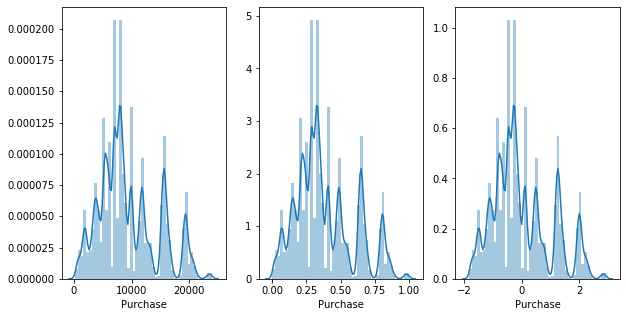

In [168]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
sns.distplot(data['Purchase'],ax=ax[0])
sns.distplot(data1['Purchase'],ax=ax[1])
sns.distplot(data3['Purchase'],ax=ax[2])
plt.show()

## TRAIN TEST SPLIT

##### our algorithm is to increase the accuracy of the predict 

In [169]:
data=pd.read_csv("BlackFriday.csv")
data=data.drop(["User_ID","Product_ID"],axis=1)

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X=data.drop(['Purchase'],axis=1)
y=data['Purchase']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [174]:
print(X_train.shape)
print(X_test.shape)

(376303, 9)
(161274, 9)


In [175]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
ss=StandardScaler()

In [184]:
num_cols=list(X_train.select_dtypes(exclude=["object"]))
Xtrn2=ss.fit_transform(X_train[num_cols])
X_train[num_cols]=Xtrn2
Xtst2=ss.transform(X_test[num_cols])
X_test[num_cols]=Xtst2

C:\Users\vikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vikhi\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [185]:
X_trn2.head()

NameError: name 'X_trn2' is not defined